In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This code tries to solve the joint distribution of the P_1 vector

The P1 vector is multivariate lognormally distributed. This is the case because each variable in the vector is lognormally distributed. To get the distribution of this vector, we first need to calculate the parameters of the lognormal distribution for each variable. To get this distribution, we have to know the components of these equations depicting the mean of the lognormal variable and the variance of the lognormal variable:
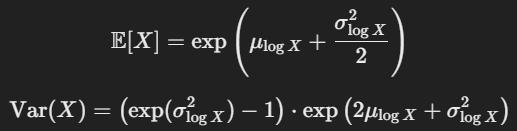

The elements of this equation is the mean of the log variables (the normally distributed variables).

To get those we need to calculate the expected value of each variable 1 year into the future, and the variance of the variable 1 year into the future. The variance of the variable accumulates linearly over time, as well as the mean. We can therefore use these equations to calculate the parameters 1 year into the future:

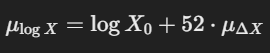

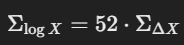

FX_1 is lognormally distributed. The initial logFX_0 is fixed, and the ΔlogFX_t is normally distributed. When calculating logFX_1 as logFX_1 = logFX_0 + 52 * E[ΔlogFX_t] we get a normally distributed logFX_1. When taking the exponent of this it becomes lognormally distributed. We can get the distribution of this through the above equations.

# Mean and variance of FX_t

In [4]:
# Calculate normal distribution mean
logfx_0 = 0.055292786
delta_logfx_t = 0

mean_logfx_1 = logfx_0 + 52 * delta_logfx_t


# Calculate Variance
var_delta_logfx_t = 0.000112779511530278

var_logfx_1 = var_delta_logfx_t * 52 #=0.005864534599574456


# Calculate the lognormal mean
mean_fx_1 = np.exp(mean_logfx_1 + var_logfx_1/2)

# Calculate the lognormal variance
var_fx_1 = (np.exp(var_logfx_1) - 1) * np.exp(2 * mean_logfx_1 + var_logfx_1)
# = 0.006608171132947867

# the number of USD to buy 1 EUR in zero years is 1.0568500002655772
fx_0 = np.exp(logfx_0)
print(fx_0)

# the number of USD to buy 1 EUR in one year is 1.0599535283673007
print(mean_fx_1)

print(var_fx_1)


1.0568500002655772
1.0599535149056654
0.006608171132947867


# Mean and variance of V_1 US LOCAL

In [7]:
# initial value
log_v_0_us_local = 0
delta_log_v_0_us_local = 0.07 * 1 / 52

mean_log_v_1_us_local = log_v_0_us_local + 52 * delta_log_v_0_us_local
print(mean_log_v_1_us_local)

# Calculate variance
var_delta_log_v_0_us_local = 0.000428008868650075

var_log_v_1_us_local = 52 * var_delta_log_v_0_us_local
print(var_log_v_1_us_local)

# Calculate the lognormal mean
mean_v_1_us_local = np.exp(mean_log_v_1_us_local + var_log_v_1_us_local/2)

# Calculate the lognormal variance
var_v_1_us_local = (np.exp(var_log_v_1_us_local) - 1) * np.exp(2 * mean_log_v_1_us_local + var_log_v_1_us_local)

# the value of US equity in USD in zero years is 1.0
v_0_us_local = np.exp(log_v_0_us_local)
print(v_0_us_local)

# the value of US equity in USD in 1 year is 1.084509954996659
print(mean_v_1_us_local)


print(var_v_1_us_local)

0.07
0.022256461169803902
1.0
1.084509954996659
0.02647067952347849


In [109]:
v_1_us = 1/mean_fx_1 * mean_v_1_us_local

# Value of USD equities in EUR in one year.
v_1_us

np.float64(1.023167468899029)

# Mean and variance of V_1 EU

In [9]:
# initial value
log_v_0_eu = 0
delta_log_v_0_eu = 0.06 * 1 / 52

mean_log_v_1_eu = log_v_0_eu + 52 * delta_log_v_0_eu

# Calculate variance
var_delta_log_v_0_eu = 0.000465448340811723

var_log_v_1_eu = 52 * var_delta_log_v_0_eu

# Calculate the lognormal mean
mean_v_1_eu = np.exp(mean_log_v_1_eu + var_log_v_1_eu/2)

# Calculate the lognormal variance
var_v_1_eu = (np.exp(var_log_v_1_eu) - 1) * np.exp(2 * mean_log_v_1_eu + var_log_v_1_eu)

# the value of EU equity in EUR in zero years is 1.0
v_0_eu = np.exp(log_v_0_eu)
print(v_0_eu)

# the value of EU equity in EUR in 1 year is 1.074764595705856
print(mean_v_1_eu)

1.0
1.074764595705856
0.0282987867660399


# Mean and variance of y1_4 and Z1_4 USD

In [15]:
# Given initial value data for year 3 and 5.
y0_3 = 0.038206506  # Initial 3-year yield (2.5%)
y0_5 = 0.037408587  # Initial 5-year yield (3.5%)
# Variance of changes in 3-year and 5-year yields from the covariance matrix
var_delta_yt_3 = 1.09022E-06  # Variance of change in 3-year yield
var_delta_yt_5 = 1.16941E-06  # Variance of change in 5-year yield

# Step 1: Calculate the initial 4-year yield using linear interpolation
y0_4 = y0_3 + ((4 - 3) / (5 - 3)) * (y0_5 - y0_3)

# mean change per week
delta_y0_4 = 0

# total change after 1 year
mean_y1_4 = y0_4 + 52 * delta_y0_4

# calculate 4-year yield variance in 1 year
var_delta_yt_4 = var_delta_yt_3 + ((4 - 3) / (5 - 3)) * (var_delta_yt_5 - var_delta_yt_3)

# total variance after 1 year
var_y1_4 = 52 * var_delta_yt_4


#########
# Since Z1_4 = exp(-y1_4 * 4), and y1_4 is normally distributed with:
# mean mean_y1_4 and variance var_y1_4, we use the properties of the log-normal
# distribution to compute the mean and variance of Z1_4

# calculate mean of bond price (lognormal mean)
mean_Z1_4 = np.exp(-mean_y1_4 * 4 + (var_y1_4*16)/2)

# calculate variance of bond price (lognormal var)
var_Z1_4 = (np.exp(16*var_y1_4)-1) * np.exp(2*-mean_y1_4*4+16*var_y1_4)

print(var_y1_4,mean_y1_4)
print(var_Z1_4)

5.875038e-05 0.0378075465
0.000695642596220734


# Mean and variance of y1_4 and Z1_4 EUR

In [16]:
# Given initial value data for year 3 and 5
EUR_y0_3 = 0.019712339  # Initial 3-year yield (2.5%)
EUR_y0_5 = 0.020047308  # Initial 5-year yield (3.5%)

# Variance of changes in 3-year and 5-year yields from the covariance matrix
EUR_var_delta_yt_3 = 6.67604E-07  # Variance of change in 3-year yield
EUR_var_delta_yt_5 = 7.24487E-07  # Variance of change in 5-year yield

# Step 1: Calculate the initial 4-year yield using linear interpolation
EUR_y0_4 = EUR_y0_3 + ((4 - 3) / (5 - 3)) * (EUR_y0_5 - EUR_y0_3)

# Mean change per week
EUR_delta_y0_4 = 0

# Total change after 1 year
EUR_mean_y1_4 = EUR_y0_4 + 52 * EUR_delta_y0_4

# Calculate the weekly time step variance through interpolation
EUR_var_delta_yt_4 = EUR_var_delta_yt_3 + ((4 - 3) / (5 - 3)) * (EUR_var_delta_yt_5 - EUR_var_delta_yt_3)

# Total variance after 1 year
EUR_var_y1_4 = 52 * EUR_var_delta_yt_4

#########
# Since Z1_4 = exp(-y1_4 * 4), and y1_4 is normally distributed with:
# mean EUR_mean_y1_4 and variance EUR_var_y1_4, we use the properties of the log-normal
# distribution to compute the mean and variance of Z1_4

# Calculate mean of bond price (lognormal mean)
EUR_mean_Z1_4 = np.exp(-EUR_mean_y1_4 * 4 + (EUR_var_y1_4 * 16) / 2)

# Calculate variance of bond price (lognormal variance)
EUR_var_Z1_4 = (np.exp(16 * EUR_var_y1_4) - 1) * np.exp(2 * -EUR_mean_y1_4 * 4 + 16 * EUR_var_y1_4)

print(EUR_var_Z1_4)


print(EUR_mean_y1_4,EUR_var_y1_4,EUR_mean_Z1_4,EUR_var_Z1_4)

0.0004943888159155057
0.019879823499999998 3.6194366e-05 0.9238276607539192 0.0004943888159155057


# Complete vector of means for the H1 vector

H1 vector is the vector that needs to be transformed into the P1 vector.

In [113]:
mu_log = [mean_logfx_1, mean_log_v_1_us_local, mean_log_v_1_eu, mean_y1_4, EUR_mean_y1_4]
mu_log

[0.055292786, 0.07, 0.06, 0.0378075465, 0.019879823499999998]

In [114]:
# TO PLOT THE LOGNORM DISTRIBUTION WE USE LOGNORM FUNCTION IN SCIPY.STATS
# THIS FUNCTION TAKES THE LOG OF THE LOGNORMALLY DISTRIBUTED VARIABLE.
# YOU WOULD THINK FOR Z1_4 THAT THIS IS Y1_4, BUT YOU WOULD BE MISTAKEN.
# IT IS ACTUALLY LOG(Z1_4) WHICH IS -4 * Y1_4. DAMN BRUH.

# Create filtered covariance matrix containing 4 year yields instead of 3 and 5 year yields

This code interpolates the values in the covariance matrix to get the values for the 4Y USD and EUR yield in the covaraince matrix.

In [20]:
import pandas as pd

# Step 1: Load the covariance matrix from the Excel file
file_path = 'covariance_matrix.xlsx'  # Update this path to the correct file location
cov_matrix_df = pd.read_excel(r"/Users/osito/Library/CloudStorage/OneDrive-CBS-CopenhagenBusinessSchool/Masters/3. Semester/Library/PyExam/Data/covariance_matrix.xlsx", index_col=0)

# Step 2: Extract relevant rows and columns for interpolation
usd_3y_5y = cov_matrix_df.loc[['3Y USD', '5Y USD']]
eur_3y_5y = cov_matrix_df.loc[['3Y EUR', '5Y EUR']]
print(usd_3y_5y)
print(eur_3y_5y)

# Step 3: Interpolate the entire row and column for 4Y USD and 4Y EUR with respect to all variables
interpolated_4y_usd = usd_3y_5y.loc['3Y USD'] + (usd_3y_5y.loc['5Y USD'] - usd_3y_5y.loc['3Y USD']) * (4 - 3) / (5 - 3)
interpolated_4y_eur = eur_3y_5y.loc['3Y EUR'] + (eur_3y_5y.loc['5Y EUR'] - eur_3y_5y.loc['3Y EUR']) * (4 - 3) / (5 - 3)
print(interpolated_4y_usd)
print(interpolated_4y_eur)

# Step 4: Insert the interpolated 4Y USD and 4Y EUR rows into the covariance matrix
cov_matrix_df.loc['4Y USD'] = interpolated_4y_usd
cov_matrix_df.loc['4Y EUR'] = interpolated_4y_eur

# Step 5: Insert the interpolated 4Y USD and 4Y EUR columns into the covariance matrix
cov_matrix_df['4Y USD'] = interpolated_4y_usd
cov_matrix_df['4Y EUR'] = interpolated_4y_eur

# Step 6: Interpolate the diagonal variances for 4Y USD and 4Y EUR
cov_matrix_df.loc['4Y USD', '4Y USD'] = usd_3y_5y.loc['3Y USD', '3Y USD'] + (usd_3y_5y.loc['5Y USD', '5Y USD'] - usd_3y_5y.loc['3Y USD', '3Y USD']) * (4 - 3) / (5 - 3)
cov_matrix_df.loc['4Y EUR', '4Y EUR'] = eur_3y_5y.loc['3Y EUR', '3Y EUR'] + (eur_3y_5y.loc['5Y EUR', '5Y EUR'] - eur_3y_5y.loc['3Y EUR', '3Y EUR']) * (4 - 3) / (5 - 3)

# Step 7: Interpolate the cross-covariance between 4Y USD and 4Y EUR
cov_4y_usd_4y_eur = cov_matrix_df.loc['3Y USD', '3Y EUR'] + (cov_matrix_df.loc['5Y USD', '5Y EUR'] - cov_matrix_df.loc['3Y USD', '3Y EUR']) * (4 - 3) / (5 - 3)
cov_matrix_df.loc['4Y USD', '4Y EUR'] = cov_4y_usd_4y_eur
cov_matrix_df.loc['4Y EUR', '4Y USD'] = cov_4y_usd_4y_eur
# The code line linearly interpolates the covariance between the 4Y USD yield and the 4Y EUR yield using the covariances at 3Y and 5Y.

# Step 8: Filter the covariance matrix to only keep the required variables
required_variables = ['fx_spot', 'EQV US', 'EQV EUR', '4Y USD', '4Y EUR']
filtered_cov_matrix_df = cov_matrix_df.loc[required_variables, required_variables]

# Bring the variances and covariances 52 weeks into the future so t=1.
filtered_cov_matrix_df = filtered_cov_matrix_df*52


# Optional: Save the filtered covariance matrix to a new Excel file
filtered_cov_matrix_df.to_excel('filtered_covariance_matrix.xlsx')

print(filtered_cov_matrix_df)
# THIS covariance matrix includes the variances and covariances of the bonds. The labels need to be renamed to reflect this.
# These were found through the rule for the variance of a scaled variable.


         fx_spot    EQV US   EQV EUR        1M EUR        1Y EUR  \
3Y USD -0.000003  0.000002  0.000004  1.823498e-08  3.476575e-07   
5Y USD -0.000003  0.000002  0.000003  1.297911e-08  3.186421e-07   

              3Y EUR        5Y EUR        7Y EUR       10Y EUR        1M USD  \
3Y USD  5.835875e-07  6.114277e-07  6.166160e-07  6.145875e-07  1.319325e-07   
5Y USD  5.856884e-07  6.537678e-07  6.840420e-07  7.037070e-07  1.036342e-07   

              1Y USD    3Y USD    5Y USD    7Y USD       10Y USD  
3Y USD  7.388585e-07  0.000001  0.000001  0.000001  9.479386e-07  
5Y USD  6.552942e-07  0.000001  0.000001  0.000001  1.098794e-06  
             fx_spot    EQV US   EQV EUR        1M EUR        1Y EUR  \
3Y EUR -3.944625e-07 -0.000003 -0.000002  2.276903e-08  4.133445e-07   
5Y EUR -3.891030e-07 -0.000003 -0.000002  1.447478e-08  3.856932e-07   

              3Y EUR        5Y EUR        7Y EUR       10Y EUR        1M USD  \
3Y EUR  6.676041e-07  6.707726e-07  6.463897e-07  6.1122

# MEAN VECTOR FOR P1
We can simply calculate the means of each variable in P1. This is done above and aggregated here:

In [116]:
# Vector of means for P1

mu_P1 = [mean_fx_1, mean_v_1_us_local, mean_v_1_eu, mean_Z1_4, EUR_mean_Z1_4]
print(mu_P1)

[np.float64(1.0599535149056654), np.float64(1.084509954996659), np.float64(1.074764595705856), np.float64(0.8600539295169973), np.float64(0.9238276607539192)]


# LOGNORMAL AND BOND COVARIANCE MATRIX

The variances and covariances of the yields have to be transformed into the variances and covariances of the bonds, while the variances and covariances for the first three variables (which are in logspace) have to be transformed into lognormal values.


In [117]:
def convert_covariance(mu_log, cov_log, T=4):
    """ 
    Full transformation of log-prices and yields to original prices and bond prices. 
    This function transforms the covariance matrix for the vector 
    [log(FX_1), log(V_US_LOCAL_1), log(V_EUR_1), y_4Y_USD, y_4Y_EUR] 
    to the covariance matrix for 
    [FX_1, V_US_LOCAL_1, V_EUR_1, Z_4Y_USD, Z_4Y_EUR].
    """
    n = len(mu_log)
    J = np.eye(n)
    
    # Step 1: Log-to-original for the first 3 variables
    for i in range(3):  # The first 3 variables are log-transformed
        J[i, i] = np.exp(mu_log[i] + 0.5 * cov_log[i, i])
    
    # Step 2: Yield-to-bond-price transformation for the last 2 variables
    Z_USD = np.exp(-mu_log[3] * T)
    Z_EUR = np.exp(-mu_log[4] * T)
    J[3, 3] = -T * Z_USD
    J[4, 4] = -T * Z_EUR
    
    # Step 3: Full transformation of the covariance matrix
    cov_P1 = J @ cov_log @ J.T
    return cov_P1

# Example data
mu_log = mu_log
cov_log = filtered_cov_matrix_df.to_numpy()

# Transform the covariance matrix for the vector [log(FX_1), log(V_US_LOCAL_1), log(V_EUR_1), y_4Y_USD, y_4Y_EUR]
cov_P1 = convert_covariance(mu_log, cov_log)
#print("Covariance matrix of P1:\n", cov_P1)

columns = ['FX_1', 'V_US_LOCAL_1', 'V_EUR_1', 'Z_4Y_USD_LOCAL', 'Z_4Y_EUR']
cov_P1_df = pd.DataFrame(cov_P1, index=columns, columns=columns)

cov_P1_df.to_excel('transformed_filtered_cov_mat.xlsx')

cov_P1_df


,FX_1,V_US_LOCAL_1,V_EUR_1,Z_4Y_USD_LOCAL,Z_4Y_EUR
FX_1,0.006589,0.002297,-0.000279,0.000583,0.000080
V_US_LOCAL_1,0.002297,0.026177,0.020366,-0.000369,0.000644
V_EUR_1,-0.000279,0.020366,0.027958,-0.000693,0.000355
Z_4Y_USD_LOCAL,0.000583,-0.000369,-0.000693,0.000695,0.000409
Z_4Y_EUR,0.000080,0.000644,0.000355,0.000409,0.000494


In [118]:
# Check if the covariance matrix is positive semi-definite
eigenvalues = np.linalg.eigvals(cov_P1_df.values)

# Check if all eigenvalues are non-negative (this is the condition for positive semi-definiteness)
is_positive_semi_definite = np.all(eigenvalues >= 0)

# Display the results
is_positive_semi_definite, eigenvalues
# (np.True_, array([0.04752207, 0.00851287, 0.00478126, 0.00096507, 0.00013107]))

(np.True_, array([0.04752207, 0.00851287, 0.00478126, 0.00096507, 0.00013107]))

The covariance matrix is SPD after transforming it.

The distribution of the P1 vector is therefore determined to be

In [119]:
# vector of means
mu_P1

# covariance matrix
cov_P1_df

print(f"mu_P1: {mu_P1}")

mu_P1: [np.float64(1.0599535149056654), np.float64(1.084509954996659), np.float64(1.074764595705856), np.float64(0.8600539295169973), np.float64(0.9238276607539192)]


This covariance matrix should be the covariance matrix for P1

# Distribution of P1 EUR vector.

I also want the covariance matrix and means for the P1 EUR vector. I believe we can do a similar transformation but with the exchange rate for the variables FX_1, V_US_LOCAL_1 and Z_4Y_USD_LOCAL. 

In [120]:
import numpy as np

def convert_covariance_to_EUR(mu_p1, cov_p1):
    """ 
    Convert the covariance matrix from USD to EUR. 
    """
    FX_1 = mu_p1[0]
    V_US_LOCAL_1 = mu_p1[1]
    Z_4Y_USD = mu_p1[3]
    
    n = len(mu_p1)
    J = np.eye(n)
    
    # 1. FX_1 -> 1 / FX_1
    J[0, 0] = -1 / (FX_1 ** 2)
    
    # 2. V_US_LOCAL_1 -> V_US_LOCAL_1 / FX_1
    J[1, 0] = -V_US_LOCAL_1 / (FX_1 ** 2)  # Partial wrt FX_1
    J[1, 1] = 1 / FX_1  # Partial wrt V_US_LOCAL_1
    
    # 3. Z_4Y_USD -> Z_4Y_USD / FX_1
    J[3, 0] = -Z_4Y_USD / (FX_1 ** 2)  # Partial wrt FX_1
    J[3, 3] = 1 / FX_1  # Partial wrt Z_4Y_USD
    
    # Full transformation of the covariance matrix
    cov_P1_EUR = J @ cov_p1 @ J.T
        
    return cov_P1_EUR

cov_P1 = cov_P1

cov_P1_eur = convert_covariance_to_EUR(mu_P1, cov_P1)

columns_EUR = ['1/FX_1', 'V_USD_1', 'V_EUR_1', 'Z_4Y_USD', 'Z_4Y_EUR']
cov_P1_eur_df = pd.DataFrame(cov_P1_eur, index=columns_EUR, columns=columns_EUR)

cov_P1_eur_df

,1/FX_1,V_USD_1,V_EUR_1,Z_4Y_USD,Z_4Y_EUR
1/FX_1,0.005220,0.003732,0.000248,0.004000,-0.000071
V_USD_1,0.003732,0.025256,0.019484,0.002351,0.000531
V_EUR_1,0.000248,0.019484,0.027958,-0.000440,0.000355
Z_4Y_USD,0.004000,0.002351,-0.000440,0.003637,0.000324
Z_4Y_EUR,-0.000071,0.000531,0.000355,0.000324,0.000494


In [121]:
# Check if the covariance matrix is positive semi-definite
eigenvalues = np.linalg.eigvals(cov_P1_eur_df.values)

# Check if all eigenvalues are non-negative (this is the condition for positive semi-definiteness)
is_positive_semi_definite = np.all(eigenvalues >= 0)

# Display the results
is_positive_semi_definite, eigenvalues

(np.True_,
 array([4.63847861e-02, 1.09857577e-02, 4.37453080e-03, 9.50216808e-05,
        7.24961930e-04]))

The covariance matrix for P1 EUR is SPD.

We do the mean vector as well. Not sure on this step.

In [122]:
import numpy as np

def convert_means_to_eur(mu_p1):
    """ 
    Convert the mean vector for P1 (USD) to P1 (EUR).
    """
    # Extract individual means from the P1 vector
    fx_mean = mu_p1[0]             # FX mean
    v_us_mean = mu_p1[1]           # USD stock mean
    v_eur_mean = mu_p1[2]          # EUR stock mean (unchanged)
    z_usd_4y_mean = mu_p1[3]       # USD bond mean
    z_eur_4y_mean = mu_p1[4]       # EUR bond mean (unchanged)
    
    # Convert each component
    mu_1 = 1 / fx_mean               # 1 / FX_1
    mu_2 = v_us_mean / fx_mean       # V_US_LOCAL / FX_1
    mu_3 = v_eur_mean                # V_EUR (unchanged)
    mu_4 = z_usd_4y_mean / fx_mean   # Z_4Y_USD / FX_1
    mu_5 = z_eur_4y_mean             # Z_4Y_EUR (unchanged)
    
    # Construct the P1 EUR mean vector
    mu_p1_eur = np.array([mu_1, mu_2, mu_3, mu_4, mu_5])
    return mu_p1_eur

# Example P1 mean vector (for USD)
mu_p1 = mu_P1  # FX, V_US_LOCAL, V_EUR, Z_4Y_USD, Z_4Y_EUR

# Convert the means to EUR
mu_P1_eur = convert_means_to_eur(mu_p1)
print("Mean vector for P1 (EUR):", mu_p1_eur)



Mean vector for P1 (EUR): [0.9434376  1.02316747 1.0747646  0.81140721 0.92382766]


The distribution of P1 EUR is therefore determined to be:

In [124]:
# Vector of means
mu_P1_eur

# Covariance matrix
cov_P1_eur_df


# The variance of each variable is 
var_P1_eur = np.diag(cov_P1_eur)
var_P1_eur

array([0.00521987, 0.02525607, 0.02795771, 0.00363745, 0.00049396])

In [125]:
# turn mu_P1_eur into a dataframe to export it
columns = ['FX_1_EUR', 'V_USD_1', 'V_EUR_1', 'Z_4Y_USD', 'Z_4Y_EUR']
mu_P1_eur_df = pd.DataFrame({'Variable': columns, 'Mean': mu_P1_eur})

# Print to check
print(mu_P1_eur_df)

# turn var_P1_eur into a dataframe to export it
var_P1_eur_df = pd.DataFrame({'Variable': columns, 'variance': var_P1_eur})
print(var_P1_eur_df)

   Variable      Mean
0  FX_1_EUR  0.943438
1   V_USD_1  1.023167
2   V_EUR_1  1.074765
3  Z_4Y_USD  0.811407
4  Z_4Y_EUR  0.923828
   Variable  variance
0  FX_1_EUR  0.005220
1   V_USD_1  0.025256
2   V_EUR_1  0.027958
3  Z_4Y_USD  0.003637
4  Z_4Y_EUR  0.000494


In [126]:
# Export the mean and variance vector of P1 EUR to be used in PnL vector.ipynb
mu_P1_eur_df.to_excel("mu_P1_eur_vector.xlsx")

var_P1_eur_df.to_excel("var_P1_eur_vector.xlsx")



# LOGNORMAL COVARIANCE MATRIX TEACHER'S FUNCTION (OUR OF ORDER, NOT RELEVANT, WRONG, DO NOT ENTER)

In [ ]:
def calculate_log_norm_mean(mu: np.ndarray, covariance: np.ndarray) -> np.ndarray:
    """
    Function that calculates the expected value of X,
    when :math:`\\log(X)` is multivariate normal

    Parameters
    ----------
    mu:
        Vector of expected values of log X
    covariance:
        Covariance matrix of log X+

    Returns
    -------
    float
        Expected value of X
    """

    return np.exp(mu + 0.5 * np.diag(covariance))


def calculate_log_norm_cov_mat(mu: np.ndarray, covariance: np.ndarray) -> np.ndarray:
    """
    Function that calculates the covariance matrix of X,
    when :math:`\\log(X)` is multivariate normal

    Parameters
    ----------
    mu:
        Vector of expected values of log X
    covariance:
        Covariance matrix of log X

    Returns
    -------
    float
        Covariance matrix of X
    """

    mu_l = calculate_log_norm_mean(mu, covariance)

    return np.outer(mu_l, mu_l) * (np.exp(covariance) - 1)


In [78]:
log_means = [mean_logfx_1, mean_log_v_1_us_local, mean_log_v_1_eu, -mean_y1_4 * 4, 4 * -EUR_mean_y1_4]
lg_norm_cov_mat = calculate_log_norm_cov_mat(mu=log_means, covariance=filtered_cov_matrix_df)

print(lg_norm_cov_mat)

          fx_spot    EQV US   EQV EUR    4Y USD    4Y EUR
fx_spot  0.006608  0.002299 -0.000279 -0.000146 -0.000020
EQV US   0.002299  0.026471  0.020545  0.000092 -0.000161
EQV EUR -0.000279  0.020545  0.028299  0.000173 -0.000089
4Y USD  -0.000146  0.000092  0.000173  0.000043  0.000026
4Y EUR  -0.000020 -0.000161 -0.000089  0.000026  0.000031


In [89]:
# Check if the covariance matrix is positive semi-definite
eigenvalues = np.linalg.eigvals(cov_P1_df.values)

# Check if all eigenvalues are non-negative (this is the condition for positive semi-definiteness)
is_positive_semi_definite = np.all(eigenvalues >= 0)

# Display the results
is_positive_semi_definite, eigenvalues

(np.True_, array([0.04752207, 0.00851287, 0.00478126, 0.00096507, 0.00013107]))

In [37]:
# Check if the covariance matrix is positive semi-definite
eigenvalues = np.linalg.eigvals(filtered_cov_matrix_df.values)

# Check if all eigenvalues are non-negative (this is the condition for positive semi-definiteness)
is_positive_semi_definite = np.all(eigenvalues >= 0)

# Display the results
is_positive_semi_definite, eigenvalues

(np.True_,
 array([4.07725132e-02, 7.40004152e-03, 4.15885870e-03, 7.76455078e-05,
        1.01952161e-05]))

The eigenvalues for the covariance matrix containing the interpolated 4-year USD and EUR yields is positive semi-definite.

If there is a problem with the final lognormal covariance matrix, then there must be a mistake in the transformation.

In [38]:
# Testing the 52 weeks into the future covariance matrix:

future_cov_mat = filtered_cov_matrix_df * 52

# Check if the covariance matrix is positive semi-definite
eigenvalues = np.linalg.eigvals(future_cov_mat.values)

# Check if all eigenvalues are non-negative (this is the condition for positive semi-definiteness)
is_positive_semi_definite = np.all(eigenvalues >= 0)

# Display the results
is_positive_semi_definite, eigenvalues

(np.True_,
 array([2.12017069e+00, 3.84802159e-01, 2.16260652e-01, 4.03756641e-03,
        5.30151237e-04]))

The eigenvalues for the interpolated covariance matrix brought into 52 weeks into the future is also semi positive definite. There must be a mistake in the transformation.

In [39]:
# To describe the distribution of the multivariate lognormal vector P1,
# we need a vector of lognormal means, and a lognormal covariance matrix
# The covariance matrix that needs to be transformed has been extracted 
# from the given covariance matrix. Furthermore, the variances and covariances
# for the 4Y USD and 4Y EUR need to be transformed into the covariance and variance
# for the bonds. 

In [40]:
# Re-import necessary libraries
import pandas as pd
import numpy as np

# Reload the updated covariance matrix from the uploaded file
file_path = 'filtered_covariance_matrix.xlsx'
cov_matrix_df = pd.read_excel(file_path, index_col=0)

# Step 1: Transform weekly covariance matrix into a 1-year covariance matrix for all variables
cov_matrix_1y = 52 * cov_matrix_df

# Step 2: Provide the means for the normal versions (log-transformed) of the log-normal variables
mean_log_vars = {
    '4Y USD': mean_y1_4,  # mean of log(4Y USD)
    '4Y EUR': EUR_mean_y1_4,  # mean of log(4Y EUR)
    'fx_spot': mean_logfx_1,     # mean of log(FX spot), can be updated with actual values
    'EQV US': mean_log_v_1_us_local,      # mean of log(EQV US), can be updated with actual values
    'EQV EUR': mean_log_v_1_eu      # mean of log(EQV EUR), can be updated with actual values
}

# Identify which variables are yields and their time to maturity
yield_labels = ['4Y USD', '4Y EUR']  # Define which variables are yields
time_to_maturity = {'4Y USD': 4, '4Y EUR': 4}  # Maturity for each yield variable

# Step 3: Transform all variances and covariances using the correct log-normal transformations
lognormal_cov_matrix = np.zeros_like(cov_matrix_1y.values)

for i, row_label in enumerate(cov_matrix_1y.index):
    for j, col_label in enumerate(cov_matrix_1y.columns):
        var_or_cov = cov_matrix_1y.loc[row_label, col_label]

        if row_label == col_label:  # Variance case
            if row_label in yield_labels:  # Special case for yield variances
                var_y = var_or_cov  # Variance of the yield
                mu_y = mean_log_vars.get(row_label, 0)  # Mean of the yield
                t_val = time_to_maturity.get(row_label, 1)  # Time to maturity
                lognormal_cov_matrix[i, j] = (np.exp(var_y * t_val**2) - 1) * np.exp(-2 * mu_y * t_val + var_y * t_val**2) # bond variance calculation
            else:  # Standard log-normal transformation
                var_log_x = var_or_cov  # Variance of log(X)
                mean_log_x = mean_log_vars.get(row_label, 0)  # Mean of log(X)
                lognormal_cov_matrix[i, j] = (np.exp(var_log_x) - 1) * np.exp(2 * mean_log_x + var_log_x)
                
        else:  # Covariance case
            if row_label in yield_labels and col_label in yield_labels:  # Special case for yield covariances
                cov_y = var_or_cov  # Covariance between yields
                mu_y_i = mean_log_vars.get(row_label, 0)  # Mean of log(first yield)
                mu_y_j = mean_log_vars.get(col_label, 0)  # Mean of log(second yield)
                t_i = time_to_maturity.get(row_label, 1)  # Maturity of first yield
                t_j = time_to_maturity.get(col_label, 1)  # Maturity of second yield
                lognormal_cov_matrix[i, j] = np.exp(cov_y * t_i * t_j) - np.exp(mu_y_i * t_i + mu_y_j * t_j) # bond covariance calculation
            else:  # Standard log-normal transformation for non-yield variables
                var_x = cov_matrix_1y.loc[row_label, row_label]
                var_y = cov_matrix_1y.loc[col_label, col_label]
                cov_log_x_y = var_or_cov  # Covariance of log(X) and log(Y)
                mu_log_x = mean_log_vars.get(row_label, 0)  # Mean of log(X)
                mu_log_y = mean_log_vars.get(col_label, 0)  # Mean of log(Y)
                lognormal_cov_matrix[i, j] = np.exp(cov_log_x_y + mu_log_x + mu_log_y + 0.5 * (var_x + var_y)) - np.exp(mu_log_x + 0.5 * var_x) * np.exp(mu_log_y + 0.5 * var_y)

# Rename yield labels to bond price labels
renamed_labels = {'4Y USD': 'Bond 4Y USD', '4Y EUR': 'Bond 4Y EUR'}
updated_index = [renamed_labels.get(label, label) for label in cov_matrix_1y.index]
updated_columns = [renamed_labels.get(label, label) for label in cov_matrix_1y.columns]

# Create a DataFrame to display the final covariance matrix with the renamed labels
final_cov_matrix_df = pd.DataFrame(lognormal_cov_matrix, index=updated_index, columns=updated_columns)

# Display the final covariance matrix
final_cov_matrix_df


,fx_spot,EQV US,EQV EUR,Bond 4Y USD,Bond 4Y EUR
fx_spot,0.540264,0.257792,-0.031034,-0.010210,-0.001305
EQV US,0.257792,7.983079,5.643730,0.009871,-0.015938
EQV EUR,-0.031034,5.643730,10.004017,0.019543,-0.009258
Bond 4Y USD,-0.010210,0.009871,0.019543,0.003069,0.001678
Bond 4Y EUR,-0.001305,-0.015938,-0.009258,0.001678,0.001887


In [41]:
# Check if the covariance matrix is positive semi-definite
eigenvalues = np.linalg.eigvals(lg_norm_cov_mat.values)

# Check if all eigenvalues are non-negative (this is the condition for positive semi-definiteness)
is_positive_semi_definite = np.all(eigenvalues >= 0)

# Display the results
is_positive_semi_definite, eigenvalues


(np.True_,
 array([4.79981636e-02, 8.55064779e-03, 4.83417503e-03, 6.06950939e-05,
        8.25020836e-06]))

In [42]:
print(lg_norm_cov_mat)
print(np.log(lg_norm_cov_mat.iloc[1, 1]))

          fx_spot    EQV US   EQV EUR    4Y USD    4Y EUR
fx_spot  0.006608  0.002299 -0.000279 -0.000146 -0.000020
EQV US   0.002299  0.026471  0.020545  0.000092 -0.000161
EQV EUR -0.000279  0.020545  0.028299  0.000173 -0.000089
4Y USD  -0.000146  0.000092  0.000173  0.000043  0.000026
4Y EUR  -0.000020 -0.000161 -0.000089  0.000026  0.000031
-3.6317175916151916


In [43]:
# Remove the variables 'Bond 4Y USD' and 'Bond 4Y EUR' from the covariance matrix
variables_to_remove = ['Bond 4Y USD', 'Bond 4Y EUR']

# Filter the covariance matrix by excluding the problematic variables
filtered_cov_matrix_df = final_cov_matrix_df.drop(index=variables_to_remove, columns=variables_to_remove)

# Check if the filtered covariance matrix is positive semi-definite
eigenvalues = np.linalg.eigvals(filtered_cov_matrix_df.values)

# Check if all eigenvalues are non-negative (condition for positive semi-definiteness)
is_positive_semi_definite = np.all(eigenvalues >= 0)

# Display the results
is_positive_semi_definite, eigenvalues


(np.True_, array([ 0.52155902,  3.27736338, 14.72843776]))

# Trash:

In [ ]:
# Step 1: Load the covariance matrix from the uploaded Excel file
file_path = 'covariance_matrix.xlsx'
cov_matrix_df = pd.read_excel(file_path, index_col=0)

# Step 2: Extract relevant rows and columns for interpolation
usd_3y_5y = cov_matrix_df.loc[['3Y USD', '5Y USD']]
eur_3y_5y = cov_matrix_df.loc[['3Y EUR', '5Y EUR']]

# Step 3: Interpolate the entire row and column for 4Y USD and 4Y EUR with respect to all variables
interpolated_4y_usd = usd_3y_5y.loc['3Y USD'] + (usd_3y_5y.loc['5Y USD'] - usd_3y_5y.loc['3Y USD']) * (4 - 3) / (5 - 3)
interpolated_4y_eur = eur_3y_5y.loc['3Y EUR'] + (eur_3y_5y.loc['5Y EUR'] - eur_3y_5y.loc['3Y EUR']) * (4 - 3) / (5 - 3)

# Step 4: Insert the interpolated 4Y USD and 4Y EUR rows into the covariance matrix
cov_matrix_df.loc['4Y USD'] = interpolated_4y_usd
cov_matrix_df.loc['4Y EUR'] = interpolated_4y_eur

# Step 5: Insert the interpolated 4Y USD and 4Y EUR columns into the covariance matrix
cov_matrix_df['4Y USD'] = interpolated_4y_usd
cov_matrix_df['4Y EUR'] = interpolated_4y_eur

# Step 6: Interpolate the diagonal variances for 4Y USD and 4Y EUR
cov_matrix_df.loc['4Y USD', '4Y USD'] = usd_3y_5y.loc['3Y USD', '3Y USD'] + (usd_3y_5y.loc['5Y USD', '5Y USD'] - usd_3y_5y.loc['3Y USD', '3Y USD']) * (4 - 3) / (5 - 3)
cov_matrix_df.loc['4Y EUR', '4Y EUR'] = eur_3y_5y.loc['3Y EUR', '3Y EUR'] + (eur_3y_5y.loc['5Y EUR', '5Y EUR'] - eur_3y_5y.loc['3Y EUR', '3Y EUR']) * (4 - 3) / (5 - 3)

# Step 7: Interpolate the cross-covariance between 4Y USD and 4Y EUR
cov_4y_usd_4y_eur = cov_matrix_df.loc['3Y USD', '3Y EUR'] + (cov_matrix_df.loc['5Y USD', '5Y EUR'] - cov_matrix_df.loc['3Y USD', '3Y EUR']) * (4 - 3) / (5 - 3)
cov_matrix_df.loc['4Y USD', '4Y EUR'] = cov_4y_usd_4y_eur
cov_matrix_df.loc['4Y EUR', '4Y USD'] = cov_4y_usd_4y_eur

# Step 8: Filter the covariance matrix to only keep the required variables
required_variables = ['fx_spot', 'EQV US', 'EQV EUR', '4Y USD', '4Y EUR']
filtered_cov_matrix_df = cov_matrix_df.loc[required_variables, required_variables]

# Step 9: Apply the time scaling (weekly to annual)
filtered_cov_matrix_df *= 52

# Step 10: Apply the (T-t)^2 transformation for the variances and (T-t)*(S-t) for the covariances
T_minus_t_usd = 4  # For 4Y USD bond
T_minus_t_eur = 4  # For 4Y EUR bond

log_z1_4_cov_matrix_df = filtered_cov_matrix_df.copy()

# Apply (T-t)^2 for variances of 4Y USD and 4Y EUR
log_z1_4_cov_matrix_df.loc['4Y USD', '4Y USD'] *= T_minus_t_usd ** 2
log_z1_4_cov_matrix_df.loc['4Y EUR', '4Y EUR'] *= T_minus_t_eur ** 2

# Apply (T-t) * (S-t) for covariances involving 4Y USD and 4Y EUR with other terms
for bond in ['4Y USD', '4Y EUR']:
    for other_bond in required_variables:
        if bond != other_bond:
            T_minus_t_bond = T_minus_t_usd if bond == '4Y USD' else T_minus_t_eur
            if '4Y USD' in other_bond:
                T_minus_t_other = T_minus_t_usd
            elif '4Y EUR' in other_bond:
                T_minus_t_other = T_minus_t_eur
            else:
                T_minus_t_other = 1  # For other non-yield variables, we assume 1
            log_z1_4_cov_matrix_df.loc[bond, other_bond] *= T_minus_t_bond * T_minus_t_other
            log_z1_4_cov_matrix_df.loc[other_bond, bond] *= T_minus_t_bond * T_minus_t_other

print(log_z1_4_cov_matrix_df)